In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

2. generate data

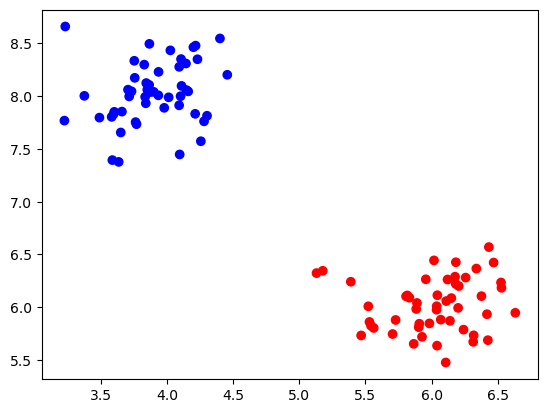

In [2]:
N1 = 50
N2 = 50
K =2
sigma = 0.1

mean = (6,6)
cov = [[sigma,0],[0,sigma]]
x1 = np.random.multivariate_normal(mean,cov,N1)
c1 = ['red']*len(x1)

mean = (4,8)
cov = [[sigma,0],[0,sigma]]
x2 = np.random.multivariate_normal(mean,cov,N2)
c2 = ['blue']*len(x2)

# outlier
mean = (9,6)
cov = [[sigma,0],[0,sigma]]
x3 = np.random.multivariate_normal(mean,cov,int(np.floor(N2)))
c3 = ['blue']*len(x3)

x = np.concatenate((x1,x2))
color = np.concatenate((c1,c2))

T =[]
for n in range(0,len(x)):
    if (n<len(x1)):
        T.append(0)
    if(n>=len(x1) and n<(len(x2)+len(x1))):
        T.append(1)
plt.scatter(x[:,0],x[:,1], marker = 'o',c=color)
plt.show()

In [3]:
first_coor = x[:,0]
second_coor = x[:,1]

In [4]:
len(x)

100

3. Implement the MAP for classification, so that using the above data as training, we can generate a classifier in the basis function space (a space with higher dimensionality). Show the first and second bases similar to:

In [108]:
def capfi_1col(axis1,axis2,u,s,M):
    # calculate FI by columns
    fik_col = np.exp(  -((axis1-u)**2+(axis2-u)**2)  /2/s**2  )
    #print(fik_col)
    return fik_col

def CAL_captical_fi(axis1,axis2,N,M,s,um):
    cap_fi = np.zeros((N,M))
    t_mle = np.zeros((N,1))

    for i in range(M):
        #for j in range (M):
        if i ==0:
            cap_fi[:,i] = 1
        else:
            cap_fi[:,i] = capfi_1col(axis1,axis2,um[i-1],s,M)
    return cap_fi

In [109]:
def sigmoid_update(N,w_bar,cap_FI):
    sigmoid_bar = []
    rnn = []
    for i in range(N):
        fi_n = cap_FI[i,:]
        #print(fi_n.shape)
        sigmoid_n = 1/(1+np.exp(-np.dot(w_bar.T,fi_n))) 
        #print(sigmoid_n)
        sigmoid_n = float(sigmoid_n)
        sigmoid_bar.append( sigmoid_n )
        rnn.append(sigmoid_n*(1-sigmoid_n))
        #print(1/(1+np.exp(-np.dot(w_bar.T,fi_n.T))))
    R = np.diag(rnn)
    sigmoid_bar_array = np.array(sigmoid_bar)
    #print("sigmoid_bar:",sigmoid_bar_array)
    #print('R:',R)
    return R,sigmoid_bar_array

In [152]:
N = len(x) #+len(second_coor)
M =  10# model complexity
alpha = 0.6
beta= 2500
um = np.arange(1/M,1,1/M)*12
s = 0.6
FI = CAL_captical_fi(first_coor,second_coor,N,M,s,um)
inv_ss0 = 1/alpha*np.identity(M)
w_bar = np.zeros((M,1))
t_bar = np.reshape(np.array(T),(N,1))

In [153]:
for i in range(20):
    
    R,sigmoid_bar_array = sigmoid_update(N,w_bar,FI)
    sigmoid_bar_array = np.reshape(sigmoid_bar_array,(N,1))
    diffE = np.dot(inv_ss0,w_bar) + np.dot(FI.T,(sigmoid_bar_array-t_bar)) # 10*10 wrong!
    #print("diffE shape:",diffE.shape)
    #print('diffE:', diffE)
    H = inv_ss0 + np.dot(np.dot(FI.T, R), FI)
    #print('H:',H)
    #print("H shape:", H.shape)
    w_bar = w_bar - np.dot(np.linalg.inv(H), diffE)
    #print("w_bar shape:",w_bar.shape)


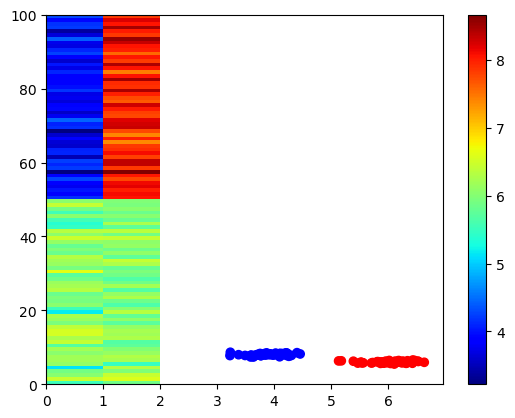

In [169]:
side = np.linspace(0, 10, 100)
Xx,Yy = np.meshgrid(side, side)
Xx_c = list(chain(*Xx))
Yy_c = list(chain(*Yy))

plt.figure(1)
cc = plt.pcolormesh(x, cmap='jet')
plt.scatter(x[:, 0], x[:, 1], marker = 'o', c = color )
plt.colorbar(cc)

In [154]:
FI

array([[1.00000000e+00, 3.91875090e-25, 7.41567292e-14, 4.70757903e-06,
        1.00251024e-01, 7.16183250e-01, 1.71634128e-03, 1.37983539e-09,
        3.72130319e-19, 3.36671983e-32],
       [1.00000000e+00, 1.22556734e-34, 5.01809880e-21, 6.89263659e-11,
        3.17596494e-04, 4.90919363e-01, 2.54559184e-01, 4.42803987e-05,
        2.58391617e-12, 5.05812388e-23],
       [1.00000000e+00, 2.59402579e-31, 1.74716423e-18, 3.94763794e-09,
        2.99216159e-03, 7.60811237e-01, 6.48952542e-02, 1.85691961e-06,
        1.78245022e-14, 5.73965600e-26],
       [1.00000000e+00, 9.30297882e-28, 8.62827450e-16, 2.68454087e-07,
        2.80194903e-02, 9.81057779e-01, 1.15231996e-02, 4.54041690e-08,
        6.00153746e-17, 2.66117513e-29],
       [1.00000000e+00, 7.16641804e-26, 1.67164221e-14, 1.30806300e-06,
        3.43366674e-02, 3.02365173e-01, 8.93201689e-04, 8.85138944e-10,
        2.94250702e-19, 3.28146451e-32],
       [1.00000000e+00, 2.82668175e-26, 1.01561215e-14, 1.22411722e-06,
   

In [155]:
sigmoid_bar_array.shape

(100, 1)

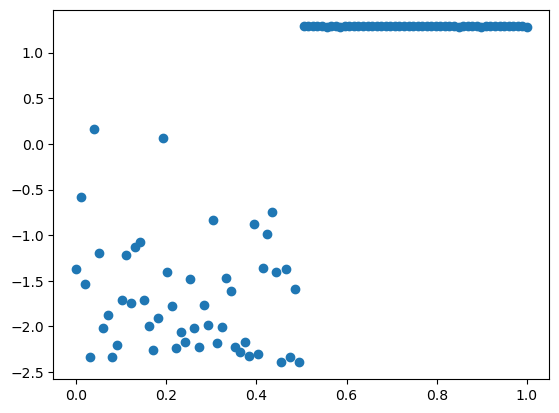

In [156]:
plt.scatter(np.linspace(0,1,100),y_pred)

In [ ]:
FI.shape
inv_ss0.shape
sigmoid_bar_array.shape
t_bar.shape

In [19]:

w_bar.shape
inv_ss0.shape

(10, 10)

In [ ]:
R.shape

In [10]:
diffE.shape

(10, 10)

In [22]:
(np.dot(inv_ss0,w_bar)+np.dot(FI.T,(sigmoid_bar_array-t_bar))).shape

(10, 10)

In [23]:
(sigmoid_bar_array-t_bar).shape

(100,)

In [27]:
t_bar = np.reshape(t_bar,(N,1))
t_bar.shape

(100, 1)